In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the csv file
df = pd.read_csv('cdc_npao.csv')
print(list(df.columns))


['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']


In [3]:
#delete unnecessary columns
df_clean = df.drop(['Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Total', 'Race/Ethnicity', 'GeoLocation', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1'], axis='columns')

In [4]:
#Add Region Column
northeast = ["PA", "NJ", "CT", "RI", "MA", "NH", "VT", "NY", "ME"]
south = ["TX", "OK", "AR", "LA", "MS", "AL", "GA", "FL", "SC", "NC", "VA", "DC", "MD", "DE", "WV", "KY", "TN", "AL"]
midwest = ["ND", "SD", "NE", "KS", "MO", "IA", "MN", "WI", "IL", "IN", "MI", "OH"]
west = ["WA", "OR", "CA", "AZ", "NV", "ID", "MT", "WY", "CO", "NM", "UT"]

#method to check which region a state is in
def get_region(state):
    if state in northeast:
        return "Northeast"
    elif state in south:
        return "South"
    elif state in midwest:
        return "Midwest"
    elif state in west:
        return "West"
    else:
        return "Unknown"
    
# Apply the function to create a new 'region' column
df_clean['region'] = df_clean['LocationAbbr'].apply(get_region)
df_clean

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value,Data_Value_Alt,...,Age(years),Education,Gender,Income,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,region
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,...,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,VALUE,1,South
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,...,NaN,NaN,Male,NaN,OWS,OWS1,Q036,VALUE,1,South
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,...,NaN,NaN,Female,NaN,OWS,OWS1,Q036,VALUE,1,South
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,...,NaN,Less than high school,NaN,NaN,OWS,OWS1,Q036,VALUE,1,South
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,...,NaN,High school graduate,NaN,NaN,OWS,OWS1,Q036,VALUE,1,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48767,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,NaN,...,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,72,Unknown
48768,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,NaN,...,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,72,Unknown
48769,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,NaN,...,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,72,Unknown
48770,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,NaN,...,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,72,Unknown


In [5]:
df_clean = df_clean.groupby(['region', 'QuestionID'])['Data_Value'].mean()
print(df_clean)

region     QuestionID
Midwest    Q018          40.721610
           Q019          26.201435
           Q036          30.220855
           Q037          34.754408
           Q043          49.152974
           Q044          19.055066
           Q045          29.918964
           Q046          28.891868
           Q047          25.780565
Northeast  Q018          35.560793
           Q019          21.852500
           Q036          26.438732
           Q037          35.420951
           Q043          50.842857
           Q044          20.378171
           Q045          31.954345
           Q046          29.921797
           Q047          25.240897
South      Q018          43.597973
           Q019          25.346807
           Q036          30.709721
           Q037          34.611488
           Q043          46.732190
           Q044          18.385714
           Q045          28.496799
           Q046          28.058508
           Q047          28.416806
Unknown    Q018          41.46831

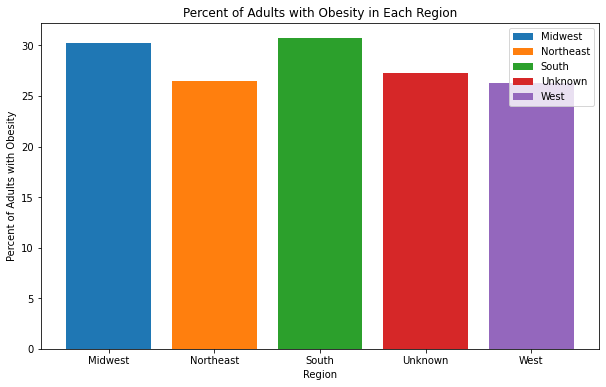

In [6]:
df_clean = df_clean.reset_index()


specific_question_data = df_clean[df_clean['QuestionID'] == 'Q036']
specific_question_data = specific_question_data.rename(columns={'Data_Value': 'PercentObesity'})


# Plot a bar graph
plt.figure(figsize=(10, 6))
for region in specific_question_data['region'].unique():
    region_data = specific_question_data[specific_question_data['region'] == region]
    plt.bar(region, region_data['PercentObesity'], label=region)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Percent of Adults with Obesity')
plt.title('Percent of Adults with Obesity in Each Region')
plt.legend()

# Show the plot
plt.show()

In [7]:
print(df_clean.head())


    region QuestionID  Data_Value
0  Midwest       Q018   40.721610
1  Midwest       Q019   26.201435
2  Midwest       Q036   30.220855
3  Midwest       Q037   34.754408
4  Midwest       Q043   49.152974


In [8]:
df_clean = df_clean.reset_index(drop=True)

df_clean

,region,QuestionID,Data_Value
0,Midwest,Q018,40.721610
1,Midwest,Q019,26.201435
2,Midwest,Q036,30.220855
3,Midwest,Q037,34.754408
4,Midwest,Q043,49.152974
5,Midwest,Q044,19.055066
6,Midwest,Q045,29.918964
7,Midwest,Q046,28.891868
8,Midwest,Q047,25.780565
9,Northeast,Q018,35.560793


In [9]:
education_questions = df_clean['QuestionID'].unique()
print(education_questions)


['Q018' 'Q019' 'Q036' 'Q037' 'Q043' 'Q044' 'Q045' 'Q046' 'Q047']


In [10]:
df_clean

,region,QuestionID,Data_Value
0,Midwest,Q018,40.721610
1,Midwest,Q019,26.201435
2,Midwest,Q036,30.220855
3,Midwest,Q037,34.754408
4,Midwest,Q043,49.152974
5,Midwest,Q044,19.055066
6,Midwest,Q045,29.918964
7,Midwest,Q046,28.891868
8,Midwest,Q047,25.780565
9,Northeast,Q018,35.560793


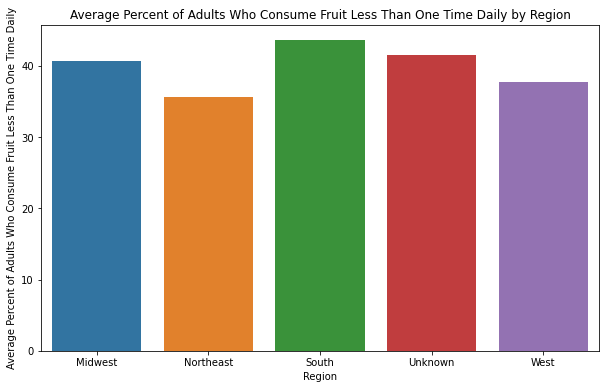

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fruit related question
fruit_data = df_clean[df_clean['QuestionID'] == 'Q018']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='Data_Value', data=fruit_data, ci=None)  

plt.xlabel('Region')
plt.ylabel('Average Percent of Adults Who Consume Fruit Less Than One Time Daily')
plt.title('Average Percent of Adults Who Consume Fruit Less Than One Time Daily by Region')


plt.show()
